In [1]:
import random
import numpy as np
import pandas as pd

length = 100000
cols = ["P", "Q", "X", "Y", "Z"]
mu = 0
sigma = 5


lst_dct = {col:[] for col in cols}
for i in range(length):
    lst_dct["P"].append(25 + np.random.normal(mu, .5 * sigma))
    lst_dct["Q"].append(50 + np.random.normal(mu, sigma))
    lst_dct["X"].append(3 * lst_dct["Q"][-1]  + np.random.normal(mu, sigma ))
    lst_dct["Y"].append(lst_dct["Q"][-1] * -1 +  np.random.normal(mu, sigma))
    lst_dct["Z"].append(
        lst_dct["P"][-1] * 2 +  1.5 * lst_dct["X"][-1] -  lst_dct["Y"][-1] * 2 +  np.random.normal(mu,  sigma))

lst_dct

{'P': [21.088974085819004,
  28.46985345548212,
  24.55930102006822,
  27.27245741307967,
  21.498347911373163,
  24.791201368341298,
  23.63707920446362,
  23.222520218803858,
  24.984631882419308,
  28.507753417782403,
  24.18644107445989,
  26.113367071100033,
  25.17223368297059,
  23.25376335091198,
  26.697455086210724,
  23.559510686293674,
  23.732278143948022,
  29.977368824590524,
  25.580345296692514,
  21.206583395978676,
  21.281303573168547,
  28.695072113847782,
  22.563891535972427,
  22.244306681393393,
  28.206221203383606,
  24.538311813428496,
  27.893638673058216,
  22.7487431538069,
  23.397118085220885,
  22.596693919445634,
  25.702502308165865,
  22.672892582924828,
  23.76127070789868,
  25.082588216539513,
  28.667616470439132,
  22.904942829201044,
  25.911282819986265,
  25.599567380384162,
  25.166168714745073,
  25.544740219045586,
  24.025713865887095,
  26.23637806516598,
  21.529935027598523,
  21.487268655794583,
  24.33142632770576,
  24.463476708936

In [2]:
df = pd.DataFrame(lst_dct)
df

,P,Q,X,Y,Z
0,21.088974,56.178808,168.784054,-53.917517,400.306063
1,28.469853,53.522657,149.352393,-58.565717,391.498616
2,24.559301,53.281679,168.129709,-52.499157,396.924371
3,27.272457,44.829028,137.938410,-47.703372,350.291055
4,21.498348,48.943994,155.342373,-33.528036,341.715252
...,...,...,...,...,...
99995,26.345558,45.425960,129.241615,-48.673901,349.151542
99996,27.494158,49.663986,147.154309,-38.733151,353.059049
99997,25.149064,49.758585,156.813674,-44.523394,374.511781
99998,24.341931,61.238484,183.071521,-62.401816,452.949687


<AxesSubplot:xlabel='Q', ylabel='Z'>

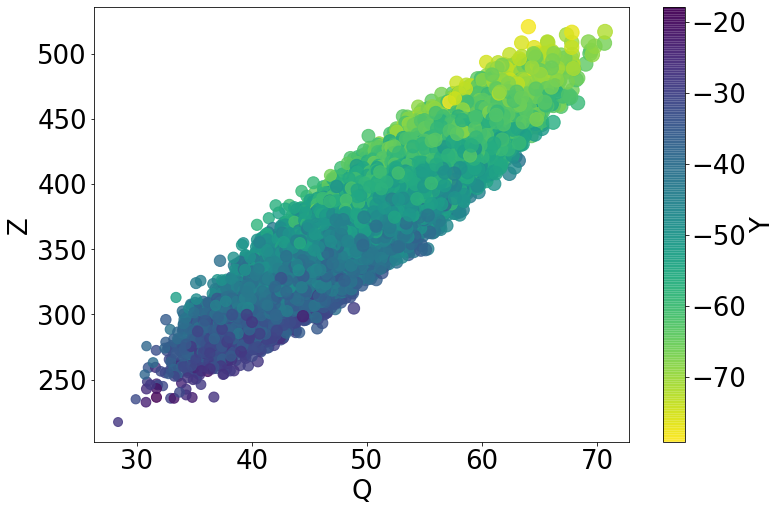

In [3]:
import matplotlib.pyplot as plt
# We can visualize the correlation of these variables on four dimensions:
#     2 dimensions in x-y space, a 3rd dimension using size and a fourth using color
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
df.plot.scatter(x = "Q", y = "Z", c = "Y",s = "X", cmap = "viridis_r",alpha = .8, ax = ax)

In [4]:
df.corr()

,P,Q,X,Y,Z
P,1.000000,-0.000021,0.000567,-0.002723,0.141600
Q,-0.000021,1.000000,0.948464,-0.708320,0.914695
X,0.000567,0.948464,1.000000,-0.671498,0.934451
Y,-0.002723,-0.708320,-0.671498,1.000000,-0.846440
Z,0.141600,0.914695,0.934451,-0.846440,1.000000


In [5]:
import statsmodels.api as sm

residuals = {}
for y_var in df.keys():
    X_vars = list(df.keys())
    X_vars.remove(y_var)
    X = df[X_vars]
    # Initial estimate should include constant
    #   This won't be the case we regress the errors
    X["Constant"] = 1
    # pass y_var as list for consistent structure
    y = df[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)

In [6]:
residuals

,P,Q,X,Y,Z
0,-1.245014,0.704929,1.412730,-0.708831,-2.906391
1,3.391875,2.921440,-0.397878,-3.650389,-6.635654
2,2.108425,-1.875925,6.879952,-3.590984,-9.389977
3,2.767186,-1.670250,4.090703,-3.195445,-6.563340
4,-1.427196,-0.997857,3.219076,2.565062,-1.312142
...,...,...,...,...,...
99995,-0.632115,1.198424,-4.586966,1.439955,5.237272
99996,1.285584,1.481023,-0.531892,2.160236,-0.100389
99997,0.080946,-1.588707,2.330375,1.035304,-0.036617
99998,-1.535881,1.100991,-2.434814,1.693027,4.818578


In [7]:
residuals.corr()[residuals.corr().abs() < 1].mul(-1).fillna(1).round(2)

,P,Q,X,Y,Z
P,1.00,-0.00,-0.59,0.63,0.71
Q,-0.00,1.00,0.50,-0.14,0.00
X,-0.59,0.50,1.00,0.74,0.83
Y,0.63,-0.14,0.74,1.00,-0.89
Z,0.71,0.00,0.83,-0.89,1.00


In [8]:
import pingouin
df.pcorr().round(2)

,P,Q,X,Y,Z
P,1.00,-0.00,-0.59,0.63,0.71
Q,-0.00,1.00,0.50,-0.14,0.00
X,-0.59,0.50,1.00,0.74,0.83
Y,0.63,-0.14,0.74,1.00,-0.89
Z,0.71,0.00,0.83,-0.89,1.00


C:\Users\caden\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


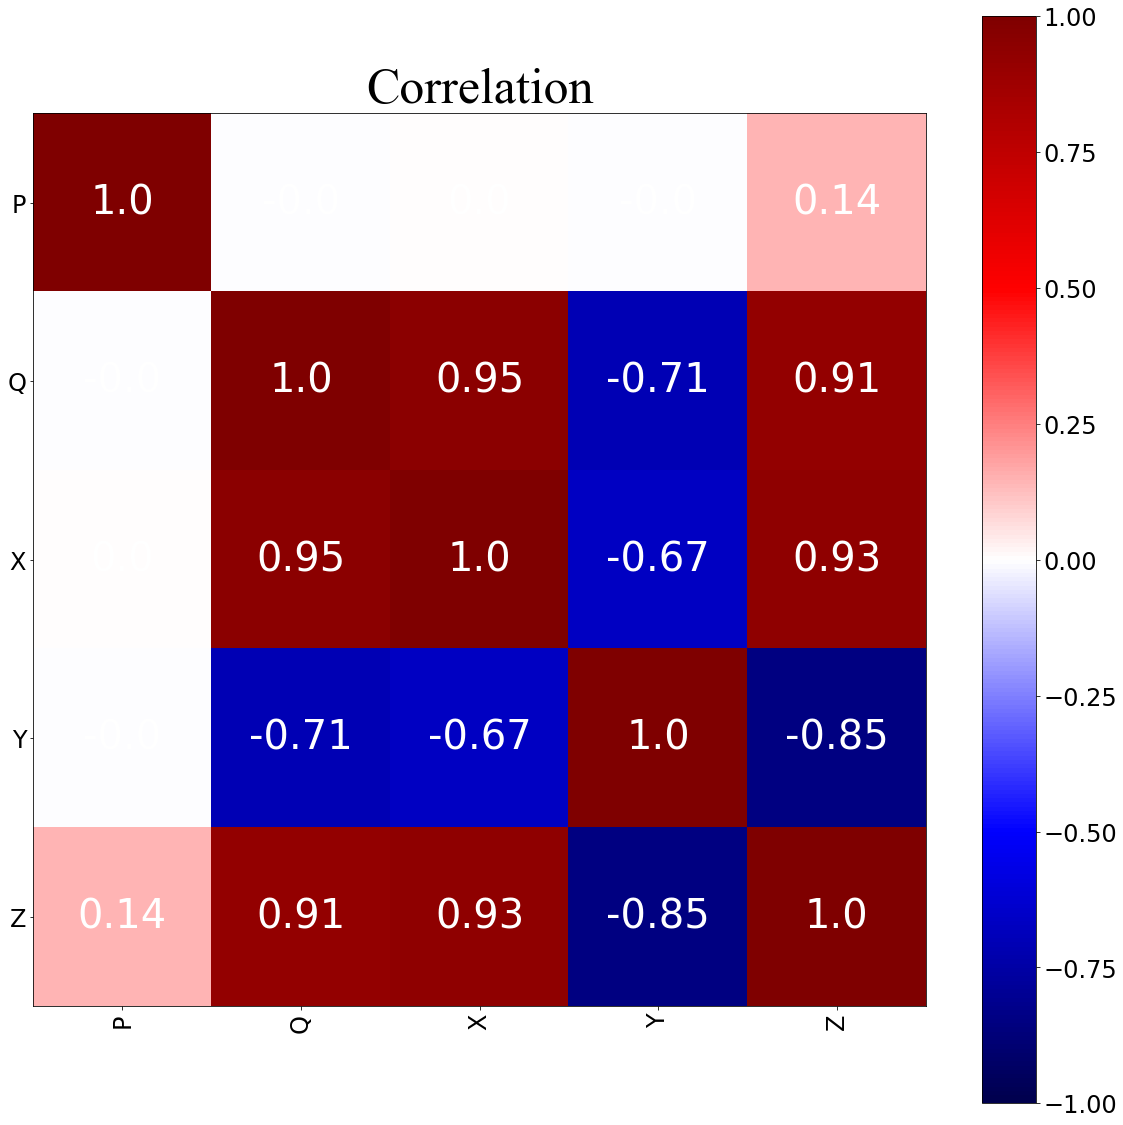

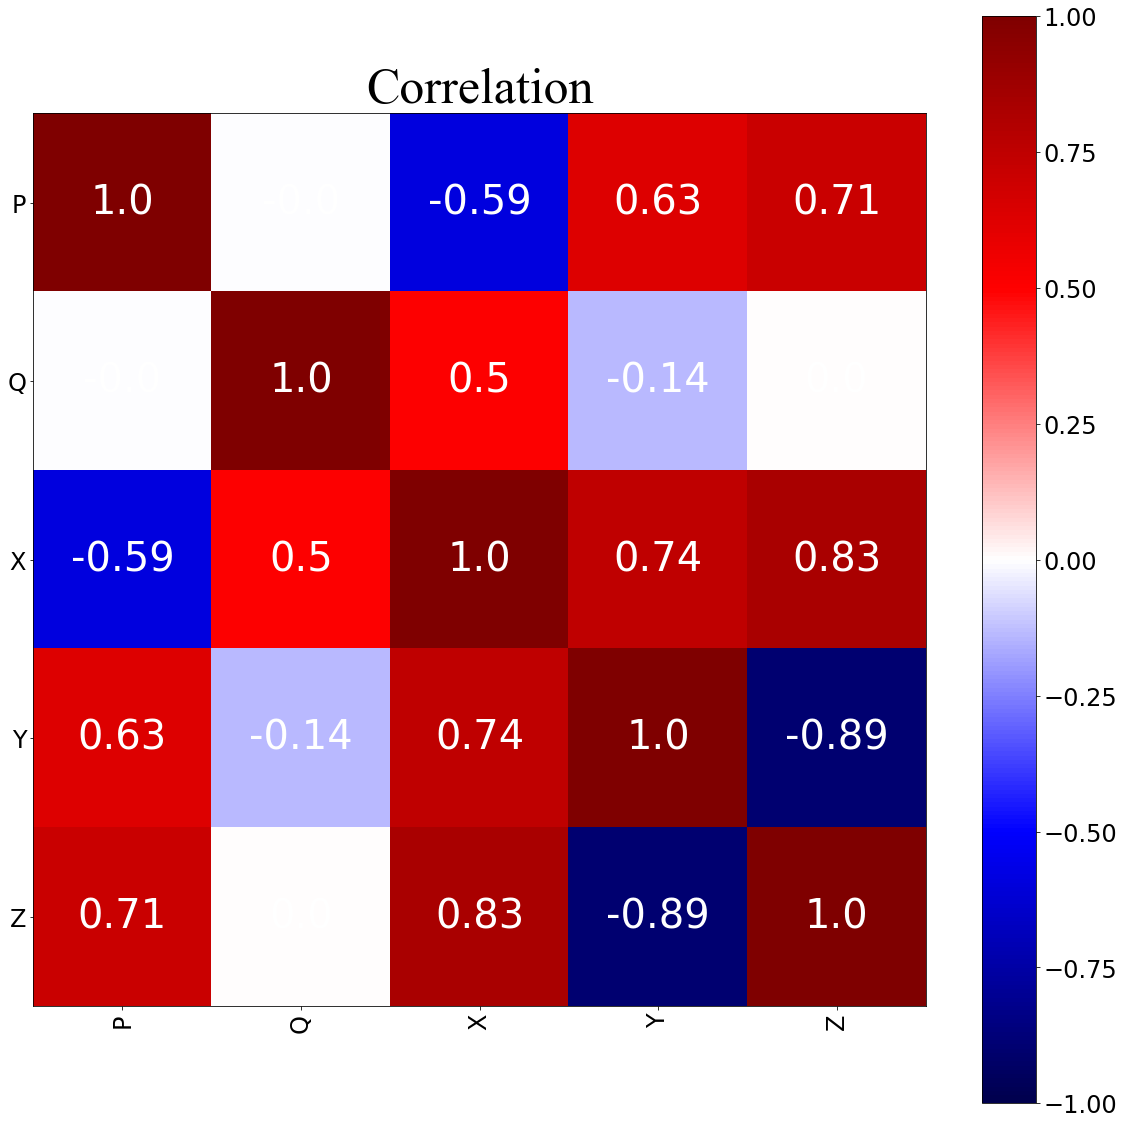

In [9]:
from datlib.plots import *
corr_matrix_heatmap(df.corr(), save_fig = False, pp = None)
corr_matrix_heatmap(df.pcorr(), save_fig = False, pp = None)

In [10]:
residuals

,P,Q,X,Y,Z
0,-1.245014,0.704929,1.412730,-0.708831,-2.906391
1,3.391875,2.921440,-0.397878,-3.650389,-6.635654
2,2.108425,-1.875925,6.879952,-3.590984,-9.389977
3,2.767186,-1.670250,4.090703,-3.195445,-6.563340
4,-1.427196,-0.997857,3.219076,2.565062,-1.312142
...,...,...,...,...,...
99995,-0.632115,1.198424,-4.586966,1.439955,5.237272
99996,1.285584,1.481023,-0.531892,2.160236,-0.100389
99997,0.080946,-1.588707,2.330375,1.035304,-0.036617
99998,-1.535881,1.100991,-2.434814,1.693027,4.818578


In [11]:
pcorr_pvalues = {}
for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            pcorr_pvalues[y][x] = sm.OLS(Y,X).fit().pvalues[x]
        
        else:
            pcorr_pvalues[y][x] = np.NaN
pd.DataFrame(pcorr_pvalues).round(2)

,P,Q,X,Y,Z
P,NaN,0.40,0.0,0.0,0.00
Q,0.4,NaN,0.0,0.0,0.77
X,0.0,0.00,NaN,0.0,0.00
Y,0.0,0.00,0.0,NaN,0.00
Z,0.0,0.77,0.0,0.0,NaN


In [12]:
undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    remaining_vars = [y for y in df.keys() if y != x]
    for y in remaining_vars:
        undirected_graph[x].append(y)

undirected_graph

{'P': ['Q', 'X', 'Y', 'Z'],
 'Q': ['P', 'X', 'Y', 'Z'],
 'X': ['P', 'Q', 'Y', 'Z'],
 'Y': ['P', 'Q', 'X', 'Z'],
 'Z': ['P', 'Q', 'X', 'Y']}

In [13]:
import copy
p_val = .01
def build_skeleton(df, undirected_graph):
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used):
        c_used = copy.copy(controls_used)
        for c_var in control_vars:
            if y not in undirected_graph[x]:
                break
            c_used.append(c_var)
            test = df.partial_corr(x = x, y = y, covar=c_used,
                                  method = "pearson")
            if test["p-val"].values[0] > p_val:
                undirected_graph[x].remove(y)
                break
            else:
                remaining_controls = copy.copy(control_vars)
                remaining_controls.remove(c_var)
                check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)
        d_sep = {}
        for x in df.keys():
            ys = undirected_graph[x]
            for y in df.keys():
                d_sep[(x,y)] = []
                if x != y:
                    test = df.partial_corr(x = x, y = y, covar = None, method = "pearson")
                    if test["p-val"].values[0] > p_val:
                        undirected_graph[x].remove(y)
                    else:
                         control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

undirected_graph = build_skeleton(df, undirected_graph)                                   
undirected_graph

{'P': ['Q', 'X', 'Y', 'Z'],
 'Q': ['P', 'X', 'Y', 'Z'],
 'X': ['P', 'Q', 'Y', 'Z'],
 'Y': ['P', 'Q', 'X', 'Z'],
 'Z': ['P', 'Q', 'X', 'Y']}

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
def graph_DAG(undirected_graph, df, title = "DAG Structure"):
    
    pcorr_matrix = df.pcorr()
    graph = nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key.replace(" ","\n"), key2[0].replace(" ","\n"))
                edges.append(edge)
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2],2))

    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, 
                     node_size = 1000,
                     with_labels=True,  arrows=False,
                     font_size = 20, alpha = 1,
                     font_color = "white",
                     ax = ax)
    nx.draw_networkx_edge_labels(graph,pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=20)
    plt.axis("off")
    plt.savefig("g1.png", format="PNG")
    plt.show()

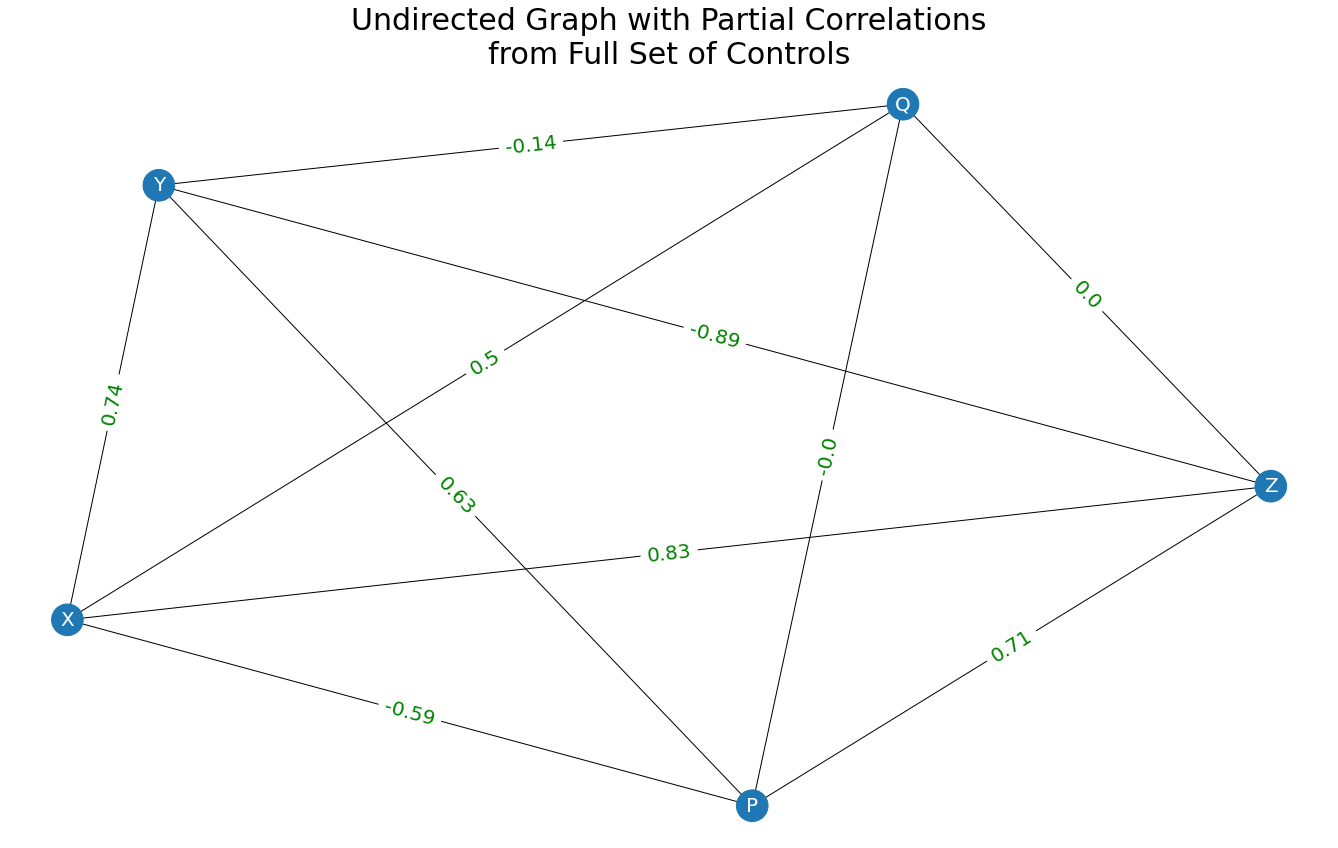

In [15]:
graph_DAG(undirected_graph, df, title = "Undirected Graph with Partial Correlations\nfrom Full Set of Controls")

In [16]:

from pgmpy.estimators import PC
c = PC(df)
max_cond_vars = len(df.keys()) - 2


model = c.estimate(return_type = "dag",variant= "parallel",
                   significance_level = p_val, 
                   max_cond_vars = max_cond_vars, ci_test = "pearsonr")
edges = model.edges()

OutEdgeView([('X', 'Z'), ('P', 'Z'), ('Y', 'Z'), ('Q', 'Y'), ('Q', 'X')])

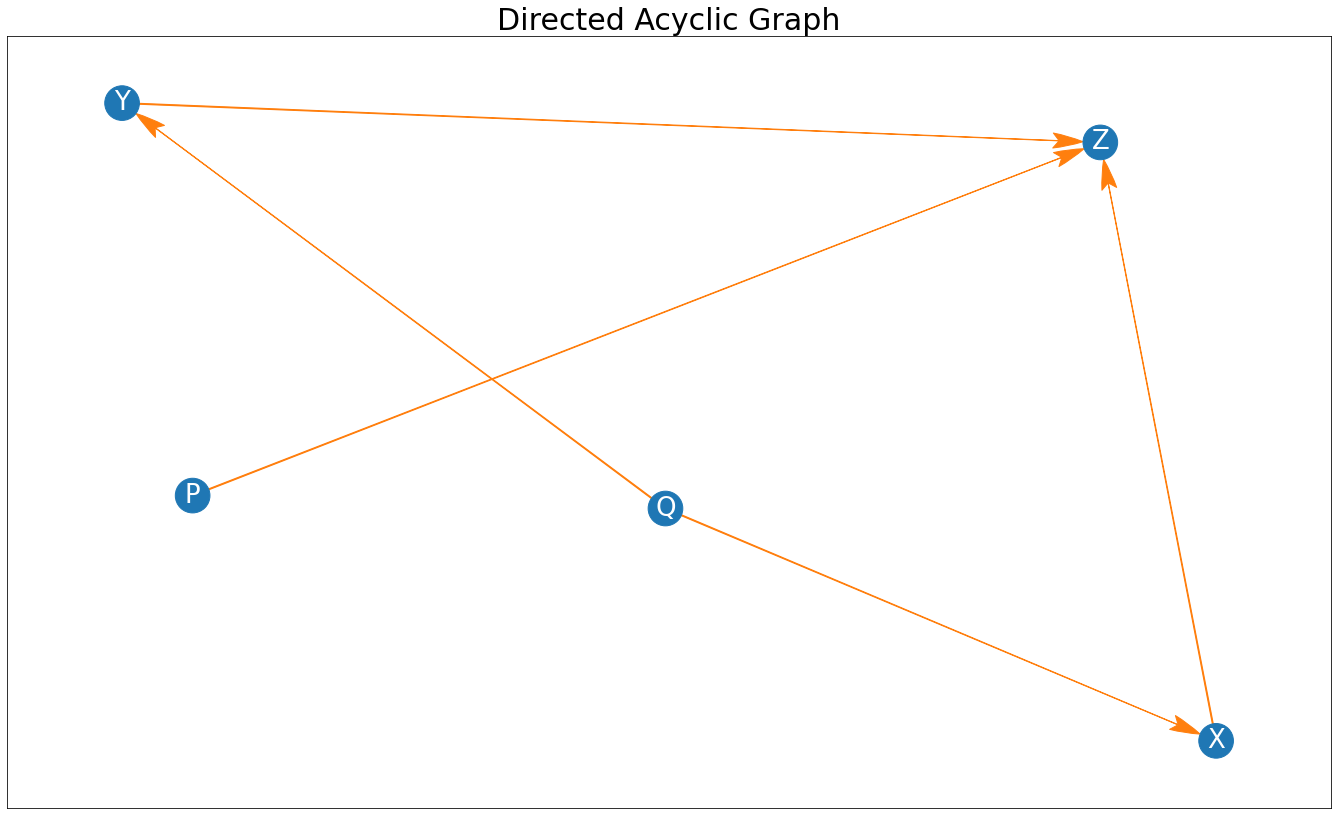

In [18]:
from matplotlib.patches import ArrowStyle

def graph_DAG(edges, df, title = ""):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                     font_color = "white",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)

graph_DAG(edges, df, title = "Directed Acyclic Graph")
edges

keep control: P
keep control: Y
('X', 'Z') ['P', 'Y']
keep control: X
keep control: Y
('P', 'Z') ['X', 'Y']
keep control: X
keep control: P
('Y', 'Z') ['X', 'P']
('Q', 'Y') []
('Q', 'X') []


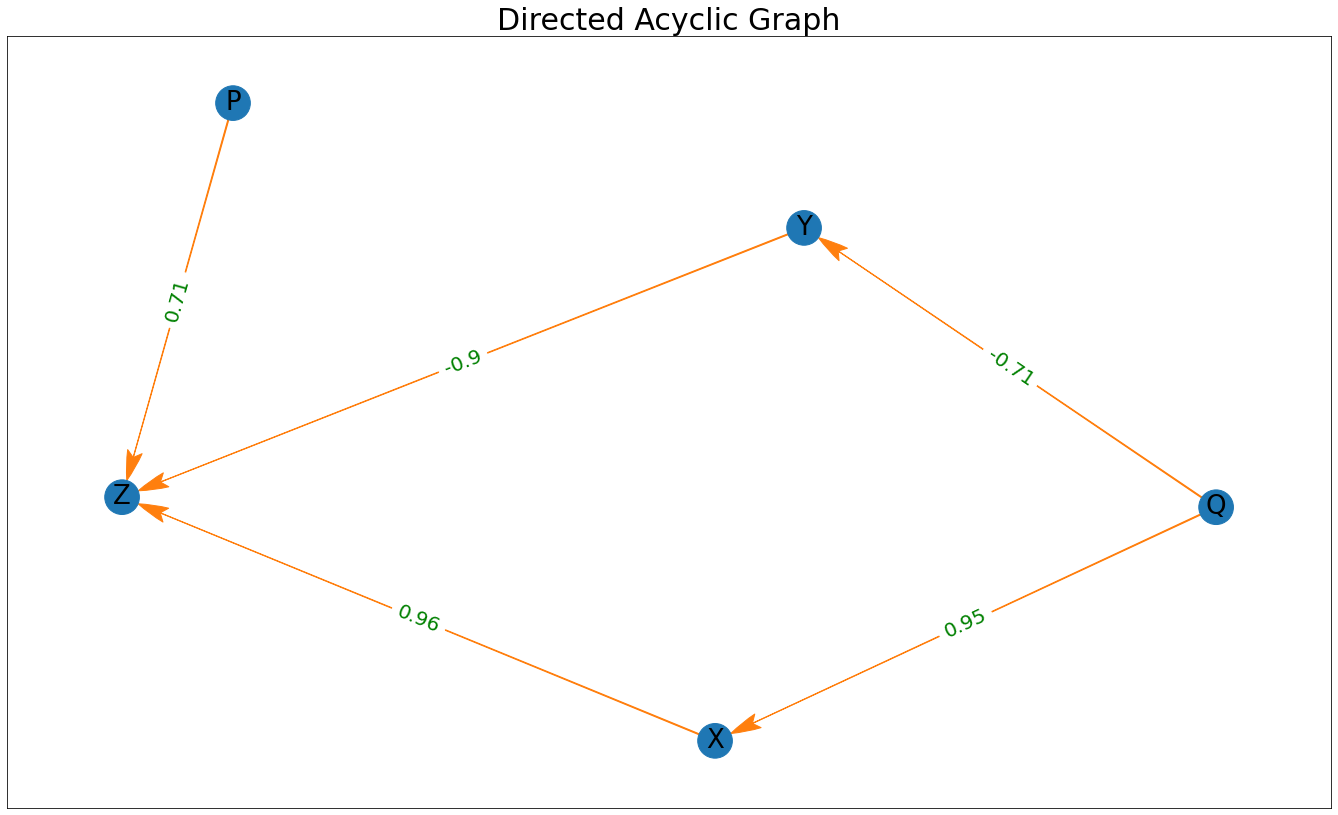

In [19]:
def graph_DAG(edges, df, title = ""):
    graph = nx.DiGraph()
    edge_labels = {}

    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        controls = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0] ]
            if (control, edge[1]) in control_edges:
                print("keep control:", control)
                keep_controls.append(control)                
        print(edge, keep_controls)
        pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr()

        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]],2))
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                 
                     font_color = "k",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)
    
    nx.draw_networkx_edge_labels(graph,pos,
                                edge_labels=edge_labels,
                                font_color='green',
                                font_size=20)

graph_DAG(edges, df, title = "Directed Acyclic Graph")